In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def fs_lambda_0(pi1,pi2,q1,q2):
    f0 = 1/(1 + pi1*q1 + pi2*q2)
    f1 = pi1*q1*f0
    f2 = pi2*q2*f0
    return f0, f1, f2

def fs_lambda_1(q2):
    f0 = 1/q2
    f1 = 0
    f2 = 1 - f0
    return f0, f1, f2

def ks(fs, pi1, pi2, q1, q2):
    fs0 = fs_lambda_0(pi1,pi2,q1,q2)
    fs1 = fs_lambda_1(q2)
    ks = []
    for i in range(3):
        ks.append((fs[i] - fs0[i])/(fs1[i] - fs0[i]))
    return ks

In [3]:
pi1, pi2, q1, q2 = 0.3, 0.3, 7, 10
df = pd.read_csv(f'res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')

In [11]:
ksEvo = [[],[],[]]
for i,row in df.iterrows():
    ks_l = ks([row['f0'], row['f1'], row['f2']], pi1, pi2, q1, q2)
    for j in range(3):
        ksEvo[j].append(ks_l[j])

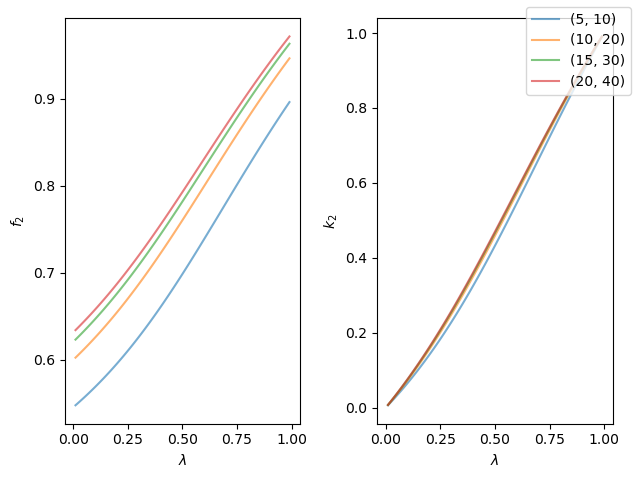

In [27]:
pi1, pi2 = 0.3, 0.3
q_pairs = [(5,10), (10,20), (15,30), (20,40)]
fig, ax = plt.subplots(1,2)
for q_pair in q_pairs:
    q1, q2 = q_pair[0], q_pair[1]
    df = pd.read_csv(f'res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
    ksEvo = [[],[],[]]
    for i,row in df.iterrows():
        ks_l = ks([row['f0'], row['f1'], row['f2']], pi1, pi2, q1, q2)
        for j in range(3):
            ksEvo[j].append(ks_l[j])
    ax[0].plot(df['lambda'], df['f2'], alpha=0.6)
    ax[1].plot(df['lambda'], ksEvo[2], label=f'{q_pair}', alpha=0.6)
ax[0].set(xlabel=r'$\lambda$', ylabel=r'$f_2$')
ax[1].set(xlabel=r'$\lambda$', ylabel=r'$k_2$')
fig.legend()
fig.tight_layout()
fig.savefig(f'compare_f2_k2_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

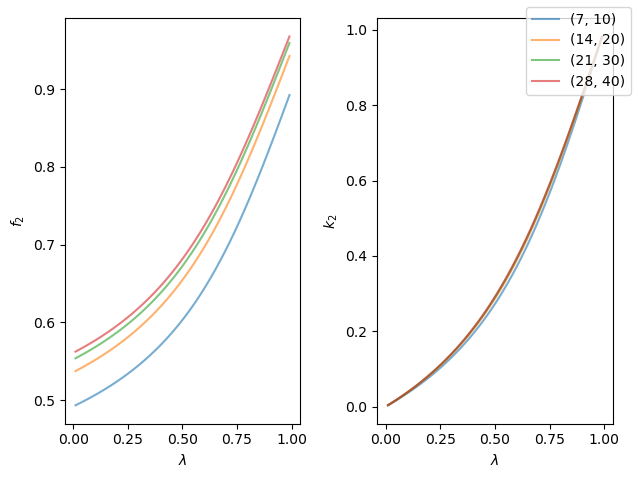

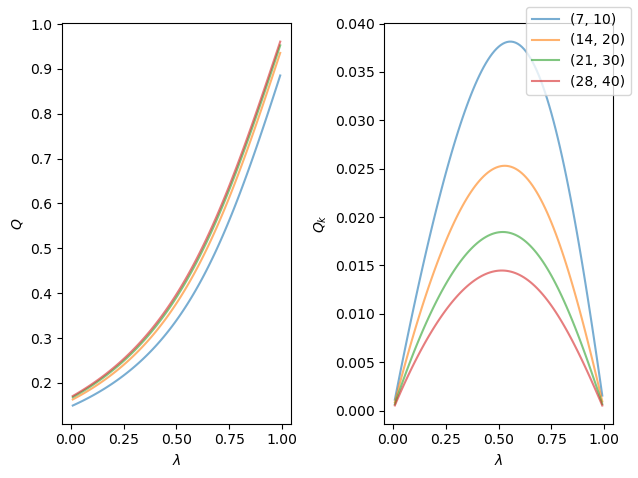

In [35]:
pi1, pi2 = 0.3, 0.3
q_pairs = [(7,10), (14,20), (21,30), (28,40)]
fig, ax = plt.subplots(1,2)
fig2, ax2 = plt.subplots(1,2)
for q_pair in q_pairs:
    q1, q2 = q_pair[0], q_pair[1]
    df = pd.read_csv(f'res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
    ksEvo = [[],[],[]]
    for i,row in df.iterrows():
        ks_l = ks([row['f0'], row['f1'], row['f2']], pi1, pi2, q1, q2)
        for j in range(3):
            ksEvo[j].append(ks_l[j])
    df['k1'] = ksEvo[1]
    df['k2'] = ksEvo[2]
    df['Q'] = df['f2'] - df['f1']
    df['Qk'] = df['k2'] - df['k1']
    ax[0].plot(df['lambda'], df['f2'], alpha=0.6)
    ax[1].plot(df['lambda'], df['k2'], label=f'{q_pair}', alpha=0.6)
    ax2[0].plot(df['lambda'], df['Q'], alpha=0.6)
    ax2[1].plot(df['lambda'], df['Qk'], alpha=0.6, label=f'{q_pair}')
ax[0].set(xlabel=r'$\lambda$', ylabel=r'$f_2$')
ax[1].set(xlabel=r'$\lambda$', ylabel=r'$k_2$')
ax2[0].set(xlabel=r'$\lambda$', ylabel=r'$Q$')
ax2[1].set(xlabel=r'$\lambda$', ylabel=r'$Q_k$')
fig.legend()
fig.tight_layout()
fig2.legend()
fig2.tight_layout()
#fig.savefig(f'compare_f2_k2_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

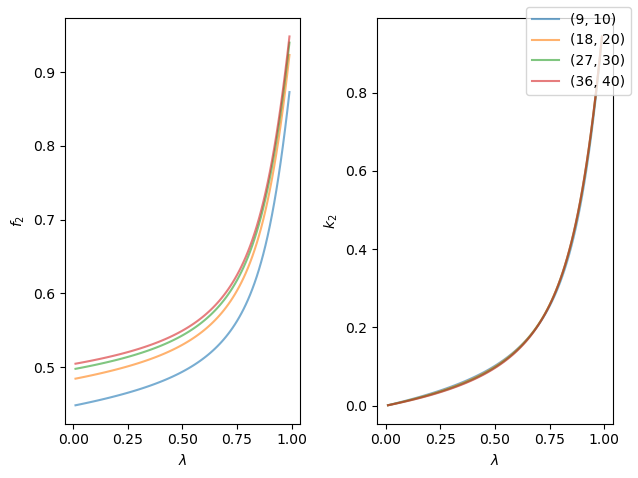

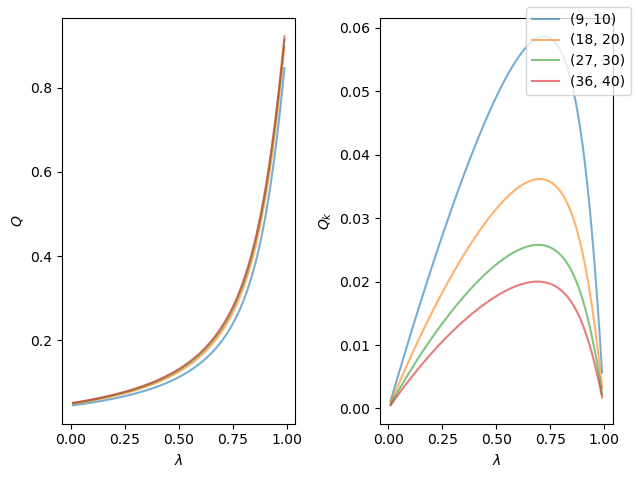

In [34]:
pi1, pi2 = 0.3, 0.3
q_pairs = [(9,10), (18,20), (27,30), (36,40)]
fig, ax = plt.subplots(1,2)
fig2, ax2 = plt.subplots(1,2)
for q_pair in q_pairs:
    q1, q2 = q_pair[0], q_pair[1]
    df = pd.read_csv(f'res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
    ksEvo = [[],[],[]]
    for i,row in df.iterrows():
        ks_l = ks([row['f0'], row['f1'], row['f2']], pi1, pi2, q1, q2)
        for j in range(3):
            ksEvo[j].append(ks_l[j])
    df['k1'] = ksEvo[1]
    df['k2'] = ksEvo[2]
    df['Q'] = df['f2'] - df['f1']
    df['Qk'] = df['k2'] - df['k1']
    ax[0].plot(df['lambda'], df['f2'], alpha=0.6)
    ax[1].plot(df['lambda'], df['k2'], label=f'{q_pair}', alpha=0.6)
    ax2[0].plot(df['lambda'], df['Q'], alpha=0.6)
    ax2[1].plot(df['lambda'], df['Qk'], alpha=0.6, label=f'{q_pair}')
ax[0].set(xlabel=r'$\lambda$', ylabel=r'$f_2$')
ax[1].set(xlabel=r'$\lambda$', ylabel=r'$k_2$')
ax2[0].set(xlabel=r'$\lambda$', ylabel=r'$Q$')
ax2[1].set(xlabel=r'$\lambda$', ylabel=r'$Q_k$')
fig.legend()
fig.tight_layout()
fig2.legend()
fig2.tight_layout()
#fig.savefig(f'compare_f2_k2_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

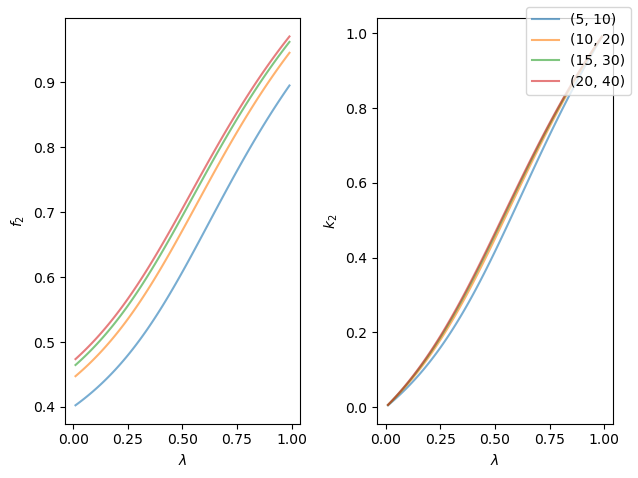

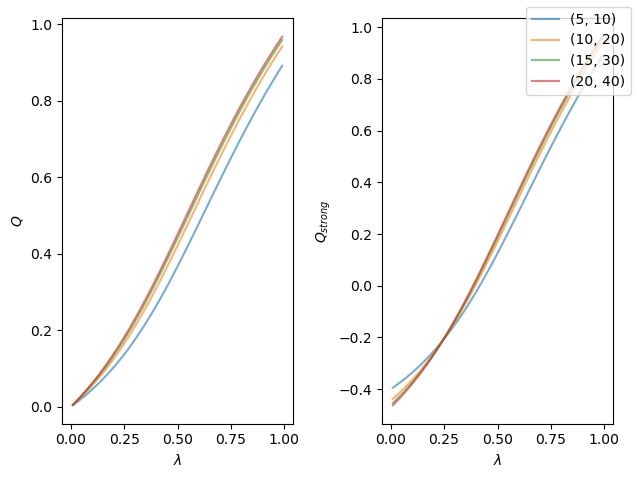

In [40]:
pi1, pi2 = 0.4, 0.2
q_pairs = [(5,10), (10,20), (15,30), (20,40)]
fig, ax = plt.subplots(1,2)
fig2, ax2 = plt.subplots(1,2)
for q_pair in q_pairs:
    q1, q2 = q_pair[0], q_pair[1]
    df = pd.read_csv(f'res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
    ksEvo = [[],[],[]]
    for i,row in df.iterrows():
        ks_l = ks([row['f0'], row['f1'], row['f2']], pi1, pi2, q1, q2)
        for j in range(3):
            ksEvo[j].append(ks_l[j])
    df['k1'] = ksEvo[1]
    df['k2'] = ksEvo[2]
    df['Q'] = df['f2'] - df['f1']
    df['Qstrong'] = df['f2'] - 2*df['f1']
    df['Qk'] = df['k2'] - df['k1']
    ax[0].plot(df['lambda'], df['f2'], alpha=0.6)
    ax[1].plot(df['lambda'], df['k2'], label=f'{q_pair}', alpha=0.6)
    ax2[0].plot(df['lambda'], df['Q'], alpha=0.6)
    ax2[1].plot(df['lambda'], df['Qstrong'], alpha=0.6, label=f'{q_pair}')
ax[0].set(xlabel=r'$\lambda$', ylabel=r'$f_2$')
ax[1].set(xlabel=r'$\lambda$', ylabel=r'$k_2$')
ax2[0].set(xlabel=r'$\lambda$', ylabel=r'$Q$')
ax2[1].set(xlabel=r'$\lambda$', ylabel=r'$Q_{strong}$')
fig.legend()
fig.tight_layout()
fig2.legend()
fig2.tight_layout()
#fig.savefig(f'compare_f2_k2_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')
#fig2.savefig(f'compare_Q_Qstrong_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

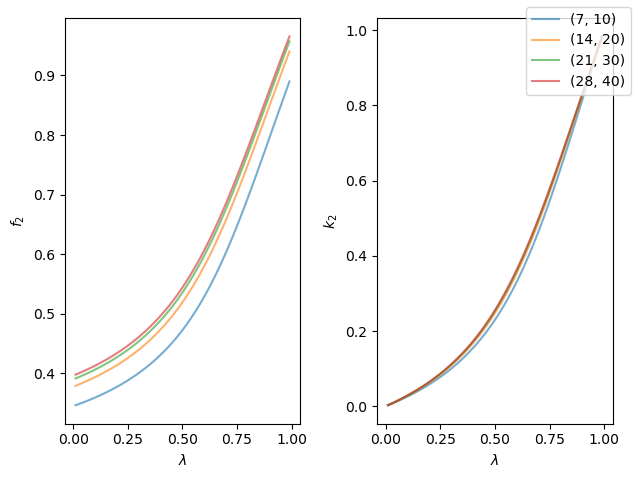

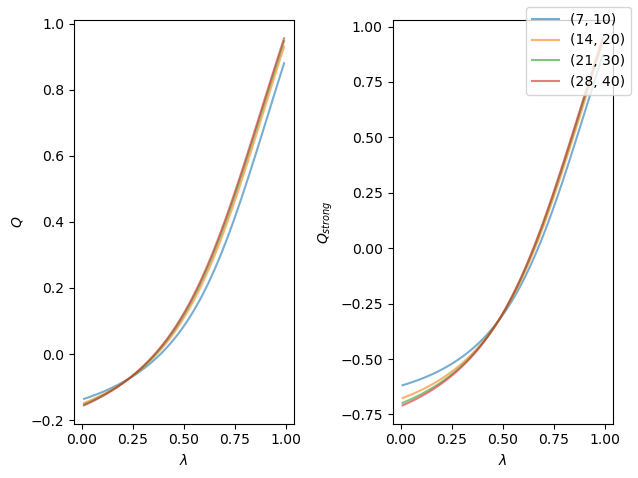

In [38]:
pi1, pi2 = 0.4, 0.2
q_pairs = [(7,10), (14,20), (21,30), (28,40)]
fig, ax = plt.subplots(1,2)
fig2, ax2 = plt.subplots(1,2)
for q_pair in q_pairs:
    q1, q2 = q_pair[0], q_pair[1]
    df = pd.read_csv(f'res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
    ksEvo = [[],[],[]]
    for i,row in df.iterrows():
        ks_l = ks([row['f0'], row['f1'], row['f2']], pi1, pi2, q1, q2)
        for j in range(3):
            ksEvo[j].append(ks_l[j])
    df['k1'] = ksEvo[1]
    df['k2'] = ksEvo[2]
    df['Q'] = df['f2'] - df['f1']
    df['Qstrong'] = df['f2'] - 2*df['f1']
    df['Qk'] = df['k2'] - df['k1']
    ax[0].plot(df['lambda'], df['f2'], alpha=0.6)
    ax[1].plot(df['lambda'], df['k2'], label=f'{q_pair}', alpha=0.6)
    ax2[0].plot(df['lambda'], df['Q'], alpha=0.6)
    ax2[1].plot(df['lambda'], df['Qstrong'], alpha=0.6, label=f'{q_pair}')
ax[0].set(xlabel=r'$\lambda$', ylabel=r'$f_2$')
ax[1].set(xlabel=r'$\lambda$', ylabel=r'$k_2$')
ax2[0].set(xlabel=r'$\lambda$', ylabel=r'$Q$')
ax2[1].set(xlabel=r'$\lambda$', ylabel=r'$Q_{strong}$')
fig.legend()
fig.tight_layout()
fig2.legend()
fig2.tight_layout()
#fig.savefig(f'compare_f2_k2_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

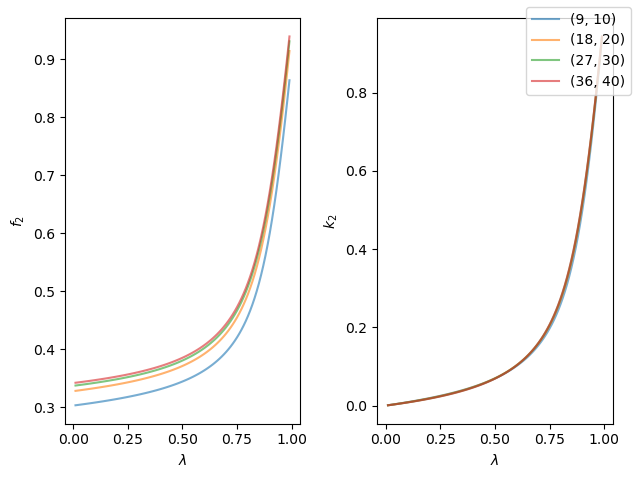

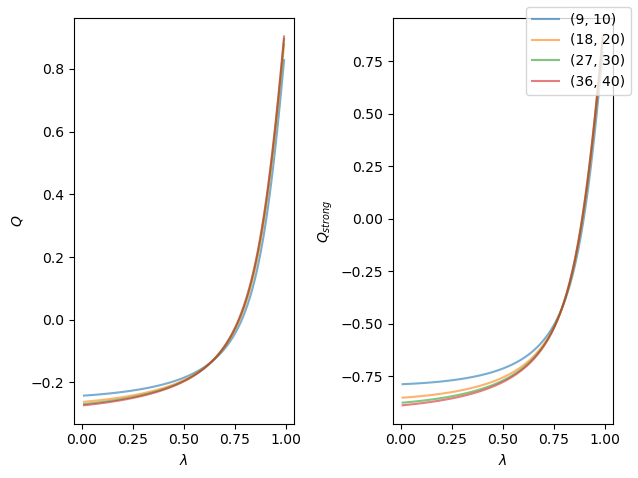

In [39]:
pi1, pi2 = 0.4, 0.2
q_pairs = [(9,10), (18,20), (27,30), (36,40)]
fig, ax = plt.subplots(1,2)
fig2, ax2 = plt.subplots(1,2)
for q_pair in q_pairs:
    q1, q2 = q_pair[0], q_pair[1]
    df = pd.read_csv(f'res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
    ksEvo = [[],[],[]]
    for i,row in df.iterrows():
        ks_l = ks([row['f0'], row['f1'], row['f2']], pi1, pi2, q1, q2)
        for j in range(3):
            ksEvo[j].append(ks_l[j])
    df['k1'] = ksEvo[1]
    df['k2'] = ksEvo[2]
    df['Q'] = df['f2'] - df['f1']
    df['Qstrong'] = df['f2'] - 2*df['f1']
    df['Qk'] = df['k2'] - df['k1']
    ax[0].plot(df['lambda'], df['f2'], alpha=0.6)
    ax[1].plot(df['lambda'], df['k2'], label=f'{q_pair}', alpha=0.6)
    ax2[0].plot(df['lambda'], df['Q'], alpha=0.6)
    ax2[1].plot(df['lambda'], df['Qstrong'], alpha=0.6, label=f'{q_pair}')
ax[0].set(xlabel=r'$\lambda$', ylabel=r'$f_2$')
ax[1].set(xlabel=r'$\lambda$', ylabel=r'$k_2$')
ax2[0].set(xlabel=r'$\lambda$', ylabel=r'$Q$')
ax2[1].set(xlabel=r'$\lambda$', ylabel=r'$Q_{strong}$')
fig.legend()
fig.tight_layout()
fig2.legend()
fig2.tight_layout()
fig.savefig(f'compare_f2_k2_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')
fig2.savefig(f'compare_Q_Qstrong_pi1_{pi1}_pi2_{pi2}_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')